# Universal Approximation Theorem

Universal Approximation Theorem이란 1개의 비선형 Activation함수를 포함하고 있는 히든 레이어를 가진 Neural Network를 이용해 어떠한 함수든 근사시킬 수 있다는 이론.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def func(x):
    """
    근사시키려는 함수
    """
    return 7*np.sin(x)*np.cos(x)*(2*x**2+5*x**3+x**2)*np.tan(x)+120 

In [11]:
x = np.linspace(-10, 10, 100)
y = func(x)

In [12]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [13]:
y

array([-9.61705008e+03, -3.98831643e+03, -7.21318592e+02,  9.41775339e+01,
       -1.23298184e+03, -4.09229365e+03, -7.70728865e+03, -1.12827929e+04,
       -1.41376494e+04, -1.58022191e+04, -1.60683775e+04, -1.49893127e+04,
       -1.28353912e+04, -1.00191958e+04, -7.00657752e+03, -4.23088831e+03,
       -2.02481714e+03, -5.79277382e+02,  6.72403804e+01,  1.13162728e+01,
       -5.53613164e+02, -1.38643734e+03, -2.24805212e+03, -2.94250151e+03,
       -3.34345618e+03, -3.40355195e+03, -3.14770160e+03, -2.65434563e+03,
       -2.03027132e+03, -1.38494559e+03, -8.09405447e+02, -3.62985074e+02,
       -6.90151843e+01,  8.13972792e+01,  1.19908210e+02,  8.89413862e+01,
        3.02517980e+01, -2.35820235e+01, -5.34898569e+01, -5.40276488e+01,
       -3.02436574e+01,  7.15640230e+00,  4.66959860e+01,  7.97565044e+01,
        1.02262163e+02,  1.14435029e+02,  1.19209378e+02,  1.20198452e+02,
        1.20084994e+02,  1.20001812e+02,  1.20002546e+02,  1.20258452e+02,
        1.22309640e+02,  

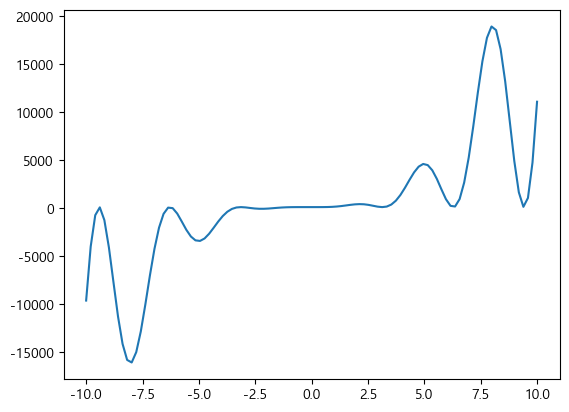

In [14]:
plt.plot(x, y)
plt.show()

In [17]:
# x, y를 tensor
X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(1).to(device)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1).to(device)
X_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [33]:
# input -> Linear -> activation함수 -> Linear -> output
activation_fn = nn.Tanh() # hyperbolic tangent
model = nn.Sequential(
    nn.Linear(1, 10000), 
    activation_fn, 
    nn.Linear(10000, 1)
)

In [34]:
### 학습
model.to(device)
loss_fn = nn.MSELoss()
optim = torch.optim.RMSprop(model.parameters(), lr=0.01)

model.train()
for epoch in range(5000):
    pred = model(X_train)
    loss = loss_fn(pred, y_train)
    loss.backward()
    optim.step()
    optim.zero_grad()
    

In [35]:
y_hat = model(X_train)

In [36]:
y_hat_arr = y_hat.to("cpu").detach().numpy().flatten()

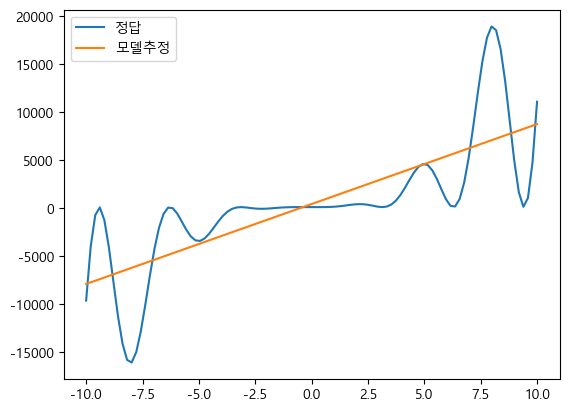

In [37]:
plt.plot(x, y, label="정답")
plt.plot(x, y_hat_arr, label="모델추정")
plt.legend()
plt.show()